# Analise de gols do campeonato brasileiro

### Importações necessárias

In [156]:
import pandas as pd
import seaborn as sns
import numpy as np

### Visualização inicial dos dados

In [100]:
base = pd.read_csv('datasets/campeonato-brasileiro-gols.csv')

In [101]:
base.head()

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
0,4607,1,Fluminense,Nirley da Silva Fonseca,59,Gol Contra
1,4607,1,Fluminense,Fred,45,Penalty
2,4607,1,Fluminense,Rafael Sóbis,31,NaN
3,4608,1,Internacional,Charles Aránguiz,6,NaN
4,4612,1,Cruzeiro,Nílton Ferreira Júnior,63,NaN


In [102]:
base.tail()

,partida_id,rodata,clube,atleta,minuto,tipo_de_gol
8927,8403,38,Santos,Messias Rodrigues da Silva Júnior,58,NaN
8928,8404,38,Sao Paulo,Luciano da Rocha Neves,26,NaN
8929,8405,38,Vasco,Sergio Antonio De Luiz Junior,82,NaN
8930,8405,38,Bragantino,Léo Ortiz,63,NaN
8931,8405,38,Vasco,Paulinho,29,NaN


In [103]:
base.columns.tolist()

['partida_id', 'rodata', 'clube', 'atleta', 'minuto', 'tipo_de_gol']

In [104]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8932 entries, 0 to 8931
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   partida_id   8932 non-null   int64 
 1   rodata       8932 non-null   int64 
 2   clube        8932 non-null   object
 3   atleta       8932 non-null   object
 4   minuto       8932 non-null   object
 5   tipo_de_gol  1089 non-null   object
dtypes: int64(2), object(4)
memory usage: 418.8+ KB


In [105]:
base['tipo_de_gol'].isnull().sum() / base.shape[0] * 100

np.float64(87.807881773399)

In [106]:
base.describe()

,partida_id,rodata
count,8932.000000,8932.000000
mean,6518.995746,19.563256
std,1100.120501,11.036544
min,4607.000000,1.000000
25%,5553.000000,10.000000
50%,6522.000000,20.000000
75%,7473.000000,29.000000
max,8405.000000,38.000000


#### Insights de limpeza iniciais

### Limpeza inicial da base

In [107]:
base.rename(columns = {'rodata':'rodada'}, inplace='True')

In [108]:
base = base.drop('partida_id', axis=1)

In [109]:
base = base.drop('tipo_de_gol', axis=1)

In [110]:
base.columns

Index(['rodada', 'clube', 'atleta', 'minuto'], dtype='object')

### EDA

In [111]:
base.columns

Index(['rodada', 'clube', 'atleta', 'minuto'], dtype='object')

In [112]:
# 1 - Maior artilheiro do CB
max_n_gols = base['atleta'].value_counts()
print(f'O maior artilheiro foi {max_n_gols.index[0]} com {max_n_gols.max()} gols.')

O maior artilheiro foi Gabriel Barbosa com 97 gols.


In [113]:
# 2 - Club com maior número de gols
clube_max_n_gols = base['clube'].value_counts()
print(f'O clube que mais marcou foi o {clube_max_n_gols.index[0]} com {clube_max_n_gols.max()} gols')

O clube que mais marcou foi o Flamengo com 590 gols


In [114]:
# 3 - Club com menor número de gols
clube_min_n_gols = base['clube'].value_counts().sort_values(ascending=True)
print(f'O clube que menos marcou foi {clube_min_n_gols.index[0]} com {clube_min_n_gols.min()} gols')

O clube que menos marcou foi Parana com 18 gols


In [124]:
# necessário alterar coluna 'minuto' para int, para calcular primeiro e segundo tempo
# valores que não foram convertidos, serão classificados com -1
base['minuto'] = pd.to_numeric(base['minuto'], errors='coerce')
base['minuto'] = base['minuto'].fillna(-1)
base.loc[base['minuto'] == -1].value_counts().sum() / base.shape[0] * 100

np.float64(10.176892073443797)

0.005634741982461277


<Axes: >

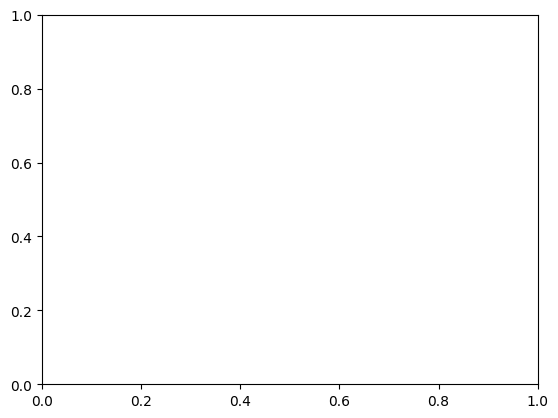

In [170]:
correlation = base['minuto'].corr(base['rodada'])
print(correlation)
sns.lineplot()